#Employee Burnout Prediction using linear Regression

#importing libs

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import pickle
import opendatasets as od
%matplotlib inline 

load data as padnas df

In [6]:
dataset_url = "https://www.kaggle.com/datasets/vijaysubhashp/employee-burnout-prediction"

In [7]:
od.download(dataset_url)

Skipping, found downloaded files in ".\employee-burnout-prediction" (use force=True to force download)


In [8]:
excel_path = 'employee-burnout-prediction/employee_burnout_analysis-AI.xlsx'

In [9]:
data = pd.read_excel(excel_path)


In [10]:
csv_path = 'employee-burnout-prediction/employee_burnout_analysis-AI.csv'
data.to_csv(csv_path, index=False)

In [15]:
data.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [19]:
data.shape



(22750, 9)

In [21]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [23]:
sns.set(style="whitegrid")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


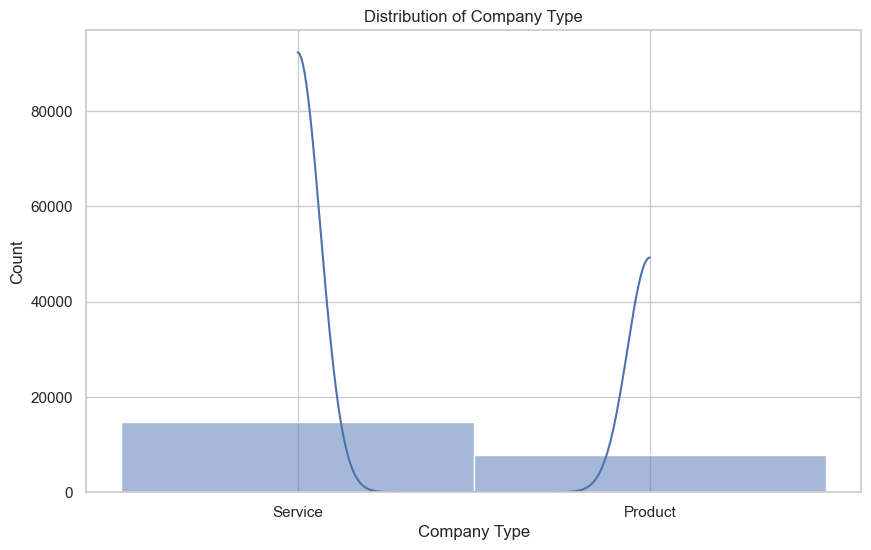

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Company Type'], kde=True, bins=30)
plt.title('Distribution of Company Type')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


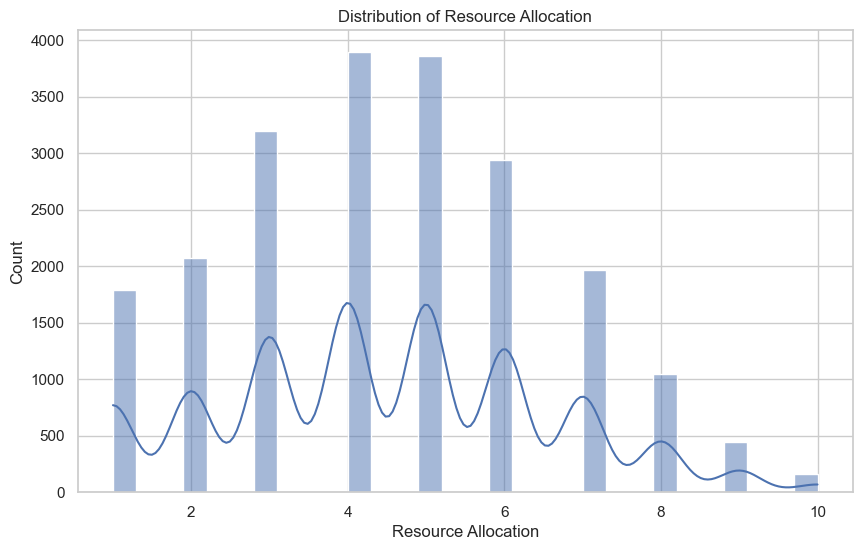

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Resource Allocation'], kde=True, bins=30)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Count')
plt.show()

In [30]:
print(data.isnull().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


#Droping the null present in Burn Rate

In [33]:
data_cleaned = data.dropna(subset=['Burn Rate'])

In [35]:
data_cleaned.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [37]:
print(data_cleaned.isnull().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64


In [39]:

data_cleaned.shape

(21626, 9)

In [41]:
columns_to_drop = ['Employee ID', 'Date of Joining']

# Drop specified columns from data_cleaned
data_dropped = data_cleaned.drop(columns=columns_to_drop)

# Check the shape of the DataFrame after dropping columns
print("Shape of the DataFrame after dropping columns:")
print(data_dropped.shape)

Shape of the DataFrame after dropping columns:
(21626, 7)


In [43]:
print(data_dropped.isnull().sum())

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64


#categorical values into numerical values

In [46]:
mapping ={'Yes':1,'No' :0}
data_dropped['WFH Setup Available'] = data_dropped['WFH Setup Available'].map(mapping)
data_dropped['Company Type'] = LabelEncoder().fit_transform(data_dropped['Company Type'])
data_dropped['Gender'] = LabelEncoder().fit_transform(data_dropped['Gender'])


In [48]:
data_dropped.head(100)


,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
2,0,0,1,2,NaN,5.8,0.49
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...
99,0,1,1,2,NaN,6.7,0.44
100,0,0,0,2,5.0,5.7,0.55
101,1,1,1,4,6.0,6.8,0.62
102,1,1,0,3,6.0,7.6,0.72


#converting date intop numerical data for not getting error in process filling null values in future

In [51]:
numeric_cols = data_dropped.select_dtypes(include=['number']).columns
means = data_dropped[numeric_cols].mean()
data_filled = data_dropped.fillna(means)



In [53]:
print(data_filled.isnull().sum())

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


In [55]:
data_filled.shape

(21626, 7)

In [57]:
data_filled.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.000000,3.8,0.16
1,1,1,1,1,2.000000,5.0,0.36
2,0,0,1,2,4.483831,5.8,0.49
3,1,1,1,1,1.000000,2.6,0.20
4,0,1,0,3,7.000000,6.9,0.52


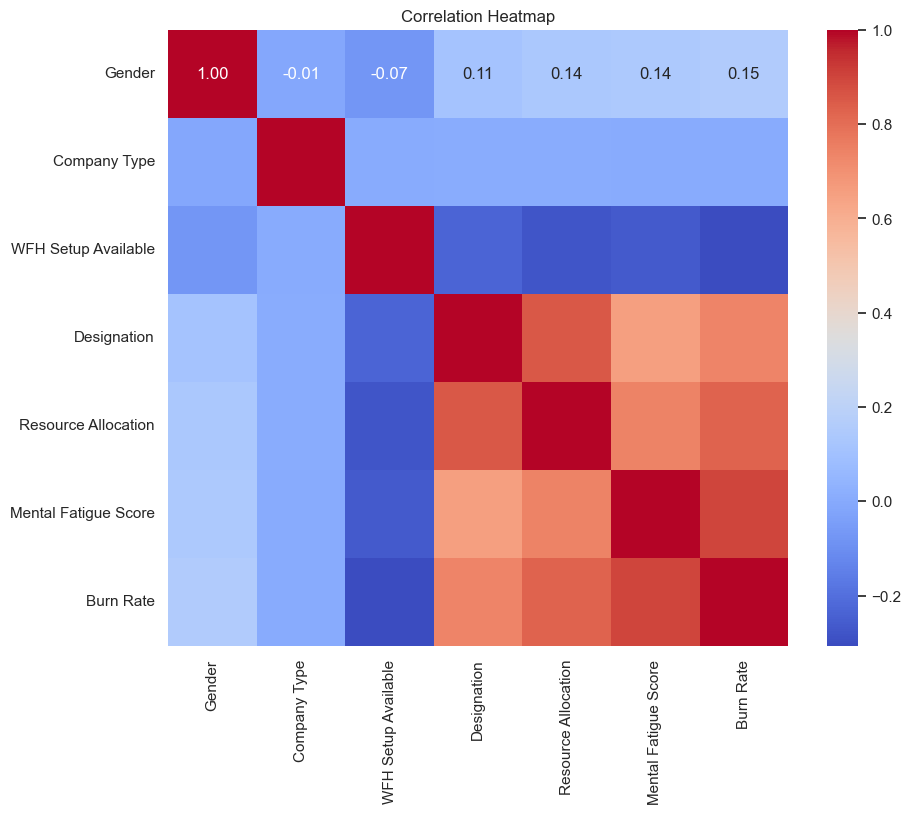

In [59]:
corr_matrix = data_filled.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#splitting the date

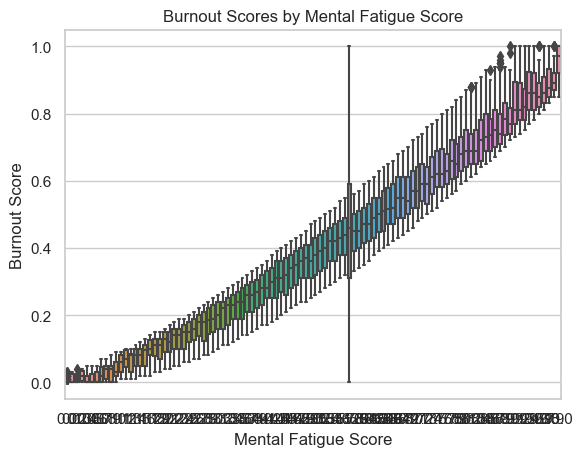

In [62]:
sns.boxplot(x='Mental Fatigue Score', y='Burn Rate', data=data_filled)
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burnout Score')
plt.title('Burnout Scores by Mental Fatigue Score')
plt.show()

In [63]:
X = data_filled.drop(columns=['Burn Rate'])
y = data_filled['Burn Rate']



In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaling features using the StandardScaler from the sklearn.preprocessing module. 
Scaling features is a common step in preparing data for machine learning models to 
ensure that the features have a standard distribution, typically with a mean of 0
and a standard deviation of 1. This can improve the performance and convergence 
speed of some algorithms.

In [69]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#model creating and training

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Prediction

In [75]:

y_pred = model.predict(X_test)


# Evaluation

In [84]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


MSE: 0.005001519951461452
MAE: 0.05346167464332706
R2: 0.8686865822548381


# Save the model, scaler

In [81]:

with open('employee_burnout_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

